# Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("owid-covid-data.csv") 
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [2]:
df.shape

(36347, 36)

# Subsetting rows with India only

In [3]:
df=df[df["location"]=="India"]
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15577,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15578,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15579,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15580,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15581,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


# Handling missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 15577 to 15801
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         225 non-null    object 
 1   continent                        225 non-null    object 
 2   location                         225 non-null    object 
 3   date                             225 non-null    object 
 4   total_cases                      225 non-null    float64
 5   new_cases                        225 non-null    float64
 6   total_deaths                     225 non-null    float64
 7   new_deaths                       225 non-null    float64
 8   total_cases_per_million          225 non-null    float64
 9   new_cases_per_million            225 non-null    float64
 10  total_deaths_per_million         225 non-null    float64
 11  new_deaths_per_million           225 non-null    float64
 12  new_tests       

In [5]:
df.shape[0]

225

Checking for more than 50% null values to remove if any

In [6]:
(df.isna().sum()/df.shape[0])*100

iso_code                            0.000000
continent                           0.000000
location                            0.000000
date                                0.000000
total_cases                         0.000000
new_cases                           0.000000
total_deaths                        0.000000
new_deaths                          0.000000
total_cases_per_million             0.000000
new_cases_per_million               0.000000
total_deaths_per_million            0.000000
new_deaths_per_million              0.000000
new_tests                          40.444444
total_tests                        37.777778
total_tests_per_thousand           37.777778
new_tests_per_thousand             40.444444
new_tests_smoothed                 35.555556
new_tests_smoothed_per_thousand    35.555556
tests_per_case                     35.555556
positive_rate                      35.555556
tests_units                        32.444444
stringency_index                    2.666667
population

In [7]:
col_list=df.columns.tolist()
for m in range(0,36):
    if ((df[col_list[m]].isna().sum()/df.shape[0])*100) > 50:
        df.drop(col_name[m],axis=1)
    else:
        pass
df.shape

(225, 36)

In [8]:
df.nunique()              #To analyze ordinal and continuous numericals

iso_code                             1
continent                            1
location                             1
date                               225
total_cases                        166
new_cases                          159
total_deaths                       147
new_deaths                         131
total_cases_per_million            164
new_cases_per_million              157
total_deaths_per_million           146
new_deaths_per_million             124
new_tests                          134
total_tests                        140
total_tests_per_thousand           137
new_tests_per_thousand             106
new_tests_smoothed                 144
new_tests_smoothed_per_thousand    120
tests_per_case                     143
positive_rate                       70
tests_units                          1
stringency_index                    23
population                           1
population_density                   1
median_age                           1
aged_65_older            

Replacing null values of continuous numerical columns with mean of respective columns

In [9]:
df.fillna(df.mean(),inplace=True) # there are no ordinal numeric columns to fill with mode

Replacing null values of categorical column with no comments<br/>
Instead of mode, we used 'no comments' as this column had only one unique value other than null values initially<br/>
This is more efficient than replacing null by mode as previously only one unique value was there and mode of that gives the same value

In [10]:
df['tests_units'].fillna('no comments',inplace=True) 

In [11]:
df['tests_units'].unique()   #now we have two unique values for this column

array(['no comments', 'samples tested'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 15577 to 15801
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         225 non-null    object 
 1   continent                        225 non-null    object 
 2   location                         225 non-null    object 
 3   date                             225 non-null    object 
 4   total_cases                      225 non-null    float64
 5   new_cases                        225 non-null    float64
 6   total_deaths                     225 non-null    float64
 7   new_deaths                       225 non-null    float64
 8   total_cases_per_million          225 non-null    float64
 9   new_cases_per_million            225 non-null    float64
 10  total_deaths_per_million         225 non-null    float64
 11  new_deaths_per_million           225 non-null    float64
 12  new_tests       

# Univariate analysis

Histograms of 10 features columns

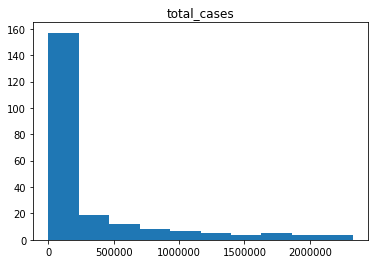

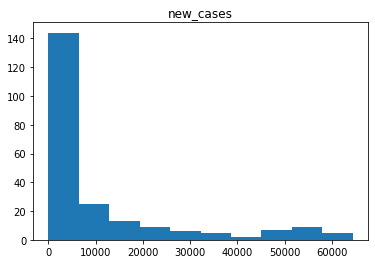

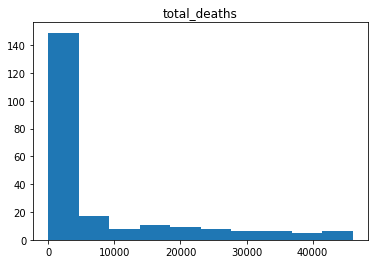

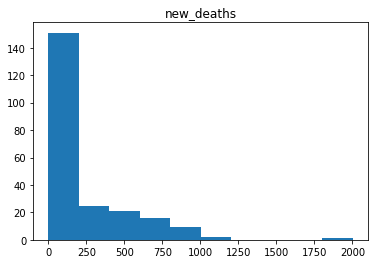

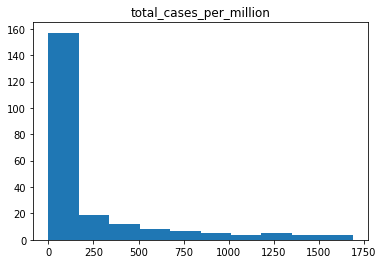

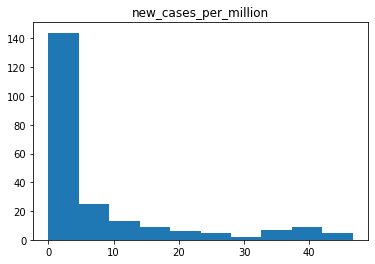

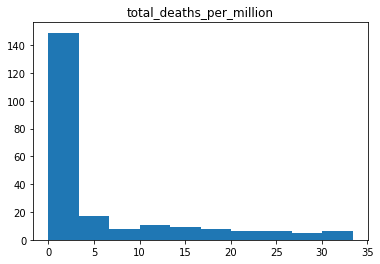

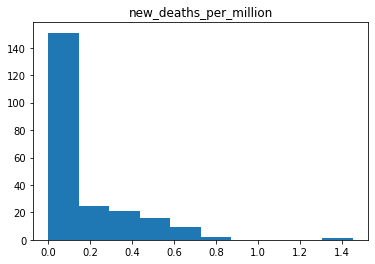

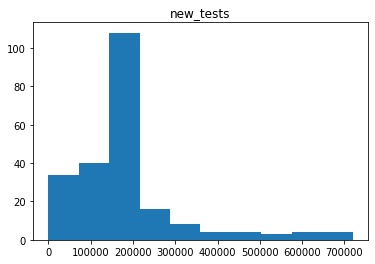

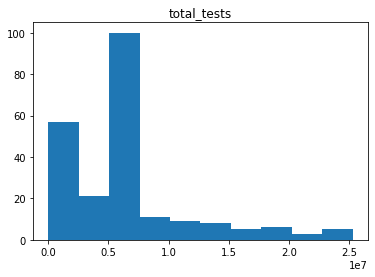

<Figure size 432x288 with 0 Axes>

In [13]:
col_list=df.columns.tolist()
for x in range(4,14):             #columns from 0 to 3 are object type
    plt.hist(df[col_list[x]])
    plt.title(col_list[x])       
    plt.show()                    
    plt.clf()  

Mean, median, mode of each column

In [14]:
dff=df.select_dtypes(include ='float64')     #float type can have mean, median, mode
dfo=df.select_dtypes(include ='object')      #object type cannot have mean, median
dff_col_list=dff.columns.tolist()
dfo_col_list=dfo.columns.tolist()
names=[]
mean=[]
median=[]
mode=[]
for k in range(0,dff.shape[1]):       #there are 31 numeric(float) type columns
    names.append(dff_col_list[k])
    mean.append(dff[dff_col_list[k]].mean())
    median.append(dff[dff_col_list[k]].median())
    mode.append(dff[dff_col_list[k]].mode()[0])
for j in range(0,dfo.shape[1]):        #there are 5 string(object) type columns
    names.append(dfo_col_list[j])
    mean.append(np.nan)
    median.append(np.nan)
    if dfo_col_list[j] == "date":      #date has no mean, median, mode
        mode.append(np.nan)
    else:
        mode.append(dfo[dfo_col_list[j]].mode()[0])
data={'column_names':names, 'mean':mean, 'median' :median, 'mode' :mode}
m_df= pd.DataFrame(data)
m_df

,column_names,mean,median,mode
0,total_cases,3.098122e+05,1.998400e+04,0
1,new_cases,1.035395e+04,1.396000e+03,0
2,total_deaths,7.603978e+03,6.400000e+02,0
3,new_deaths,2.048489e+02,4.300000e+01,0
4,total_cases_per_million,2.245008e+02,1.448100e+01,0
5,new_cases_per_million,7.502831e+00,1.012000e+00,0
6,total_deaths_per_million,5.510116e+00,4.640000e-01,0
7,new_deaths_per_million,1.484311e-01,3.100000e-02,0
8,new_tests,1.876639e+05,1.876639e+05,187664
9,total_tests,6.481009e+06,6.481009e+06,6.48101e+06


# Bivariate analysis

Scatter plots of any 10 features versus total_cases(target column)

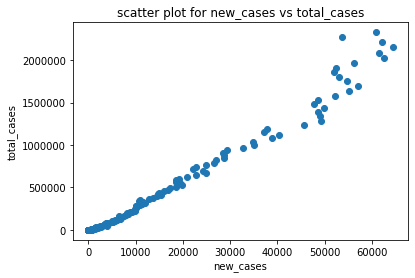

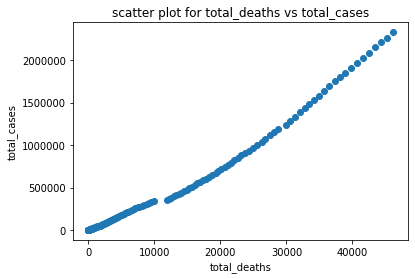

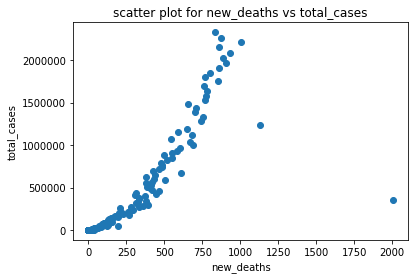

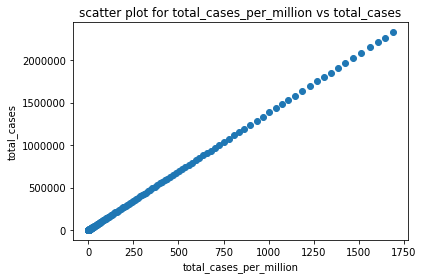

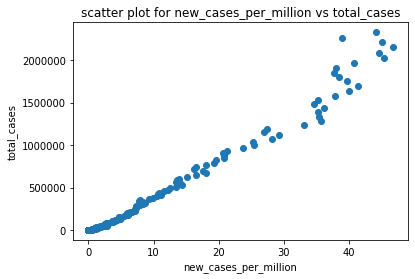

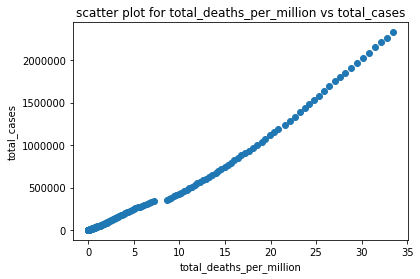

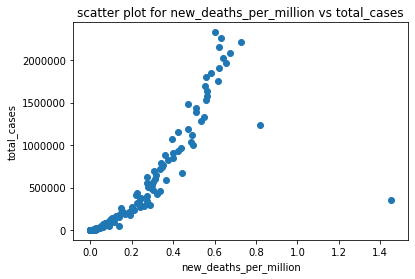

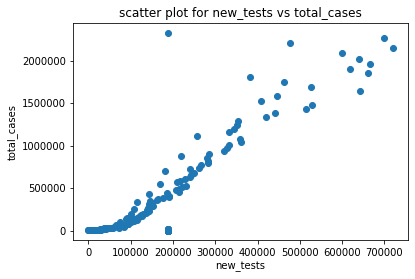

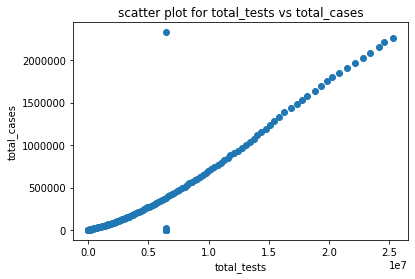

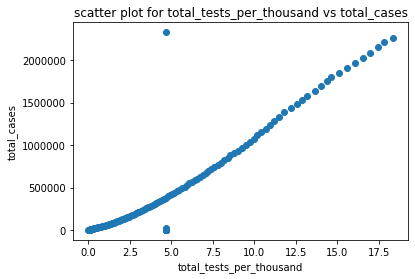

<Figure size 432x288 with 0 Axes>

In [15]:
col_list=df.columns.tolist()
for x in range(5,15):    #first 4 columns are object type and 5th column is considered as target column
    plt.scatter(df[col_list[x]],df['total_cases'])
    plt.title('scatter plot for {} vs total_cases'.format(col_list[x]))
    plt.xlabel(col_list[x])
    plt.ylabel('total_cases')
    plt.show()
    plt.clf()

Line plots of any 10 feature versus total_cases(target column)

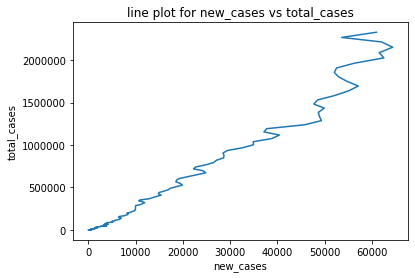

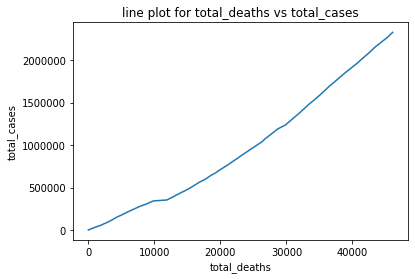

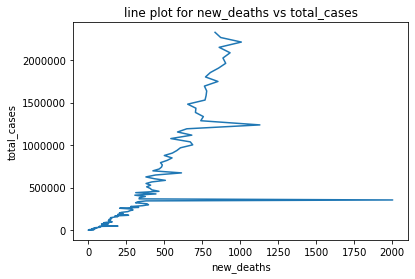

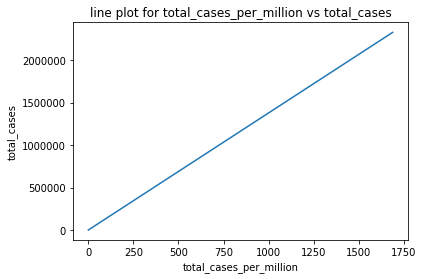

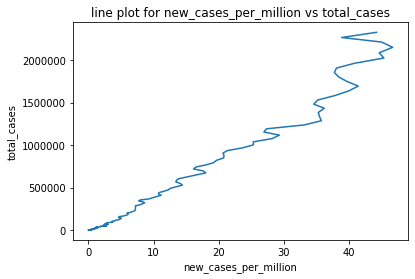

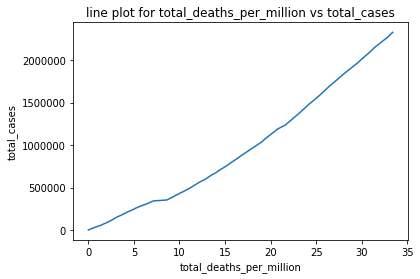

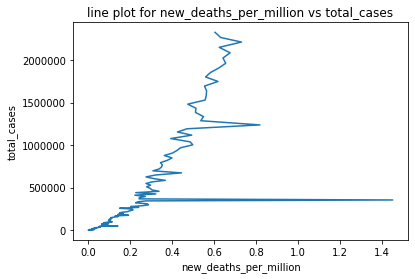

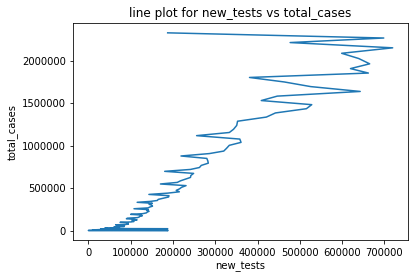

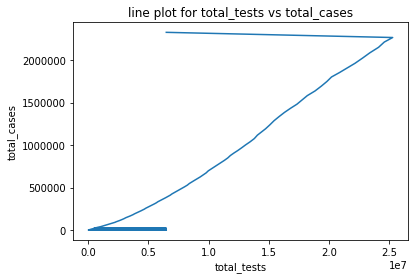

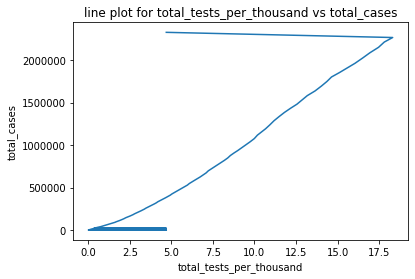

<Figure size 432x288 with 0 Axes>

In [16]:
col_list=df.columns.tolist()
for x in range(5,15):  #first 4 columns are object type and 5th column is considered as target column
    plt.plot(df[col_list[x]],df['total_cases'])
    plt.title('line plot for {} vs total_cases'.format(col_list[x]))
    plt.xlabel(col_list[x])
    plt.ylabel('total_cases')
    plt.show()
    plt.clf()

# Converting date column to ordinal

In [17]:
import datetime as dt
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].map(dt.datetime.toordinal)

# Converting useful categorical columns to numericals

In [18]:
dfo.head()  #object type columns

,iso_code,continent,location,date,tests_units
15577,IND,Asia,India,2019-12-31,no comments
15578,IND,Asia,India,2020-01-01,no comments
15579,IND,Asia,India,2020-01-02,no comments
15580,IND,Asia,India,2020-01-03,no comments
15581,IND,Asia,India,2020-01-04,no comments


Dropping useless categorical columns

In [19]:
df1=df.drop(["iso_code","continent"],axis=1) #for calculating target its enough if we know the country. Continent and ISO-code can be founds from that itself

Converting useful categorical columns to numericals by LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

In [21]:
labelEncoder.fit(df1["tests_units"])
df1["tests_units"]=labelEncoder.transform(df1["tests_units"])

In [22]:
labelEncoder.fit(df1["location"])
df1["location"]=labelEncoder.transform(df1["location"])

In [23]:
df1

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
15577,0,737424,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15578,0,737425,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15579,0,737426,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15580,0,737427,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15581,0,737428,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15797,0,737645,2088611.0,61537.0,42518.0,933.0,1513.481,44.592,30.810,0.676,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15798,0,737646,2153010.0,64399.0,43379.0,861.0,1560.147,46.666,31.434,0.624,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15799,0,737647,2215074.0,62064.0,44386.0,1007.0,1605.121,44.974,32.164,0.730,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
15800,0,737648,2268675.0,53601.0,45257.0,871.0,1643.962,38.841,32.795,0.631,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Analysis for new data 

In [24]:
df1['date'].max()

737649

In [25]:
maxdate = dt.datetime.fromordinal(df1['date'].max())
maxdate

datetime.datetime(2020, 8, 12, 0, 0)

In [26]:
newdata=pd.read_csv("new_data.txt")
newdata

,location,date,new_cases,total_deaths,new_deaths,new_tests,total_tests,new_tests_smoothed,positive_rate,tests_units,stringency_index,population_density
0,0,737650,63468,45839,947,547836.846,7235424.0,378575,0.065374,1,10.19,450.419
1,0,737652,75364,42573,563,546875.478,25467350.0,693562,0.075683,1,64.54,450.419
2,0,737656,76234,46372,847,636382.577,6437862.0,535739,0.094674,1,34.25,450.419
3,0,737659,75539,35738,964,756736.365,29673460.0,853635,0.097763,1,23.75,450.419
4,0,737663,63458,53355,943,735665.457,76942630.0,736755,0.046573,1,35.64,450.419


# Choosing target and feature columns

In [27]:
Y=df1["total_cases"]
X=df1[['location','date','new_cases','total_deaths','new_deaths','new_tests','total_tests','new_tests_smoothed','positive_rate','tests_units','stringency_index','population_density']]

In [28]:
type(X)

pandas.core.frame.DataFrame

In [29]:
X.shape

(225, 12)

# Train-test-split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# Modelling, accuracy and prediction on new data

Linear Regression modelling

In [32]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Accuracy of Linear Regression

In [33]:
reg.score(X_test,Y_test)

0.9957180991042057

In [34]:
reg.score(X_train,Y_train)

0.9960483964792013

Prediction on new data by Linear Regression

In [35]:
reg.predict(newdata)

array([2318903.94058025, 2320144.26751208, 2444347.17064941,
       2009444.7759223 , 2420702.35368478])

Random Forest Regressor modelling

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rand=RandomForestRegressor()

In [38]:
rand.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Accuracy of Random Forest Regressor

In [39]:
rand.score(X_test,Y_test)

0.9993490027967601

In [40]:
rand.score(X_train,Y_train)

0.9954454736826746

Prediction on new data by Random Forest Regressor

In [41]:
rand.predict(newdata)

array([1963149.18, 2090208.69, 2009417.12, 2001183.2 , 2201587.38])